In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle
import glob
import os
%matplotlib inline

In [101]:
ORIGINAL_SIZE = 1280, 720
UNWARPED_SIZE = 500, 600

In [102]:
# images used to find the vanishing point
straight_images = ["test_images/straight_lines1.jpg", "test_images/straight_lines2.jpg"]
# define a triangle that represents the region of interest
roi_points = np.array([[0, ORIGINAL_SIZE[1] - 50], \
                      [ORIGINAL_SIZE[0], ORIGINAL_SIZE[1] - 50], \
                      [ORIGINAL_SIZE[0]//2, ORIGINAL_SIZE[1]//2 + 50]], dtype = np.int32)
print(roi_points)
# fill these points in
roi = np.zeros((ORIGINAL_SIZE[1], ORIGINAL_SIZE[0]), dtype=np.uint8)
cv2.fillPoly(roi, [roi_points], 1)

[[   0  670]
 [1280  670]
 [ 640  410]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

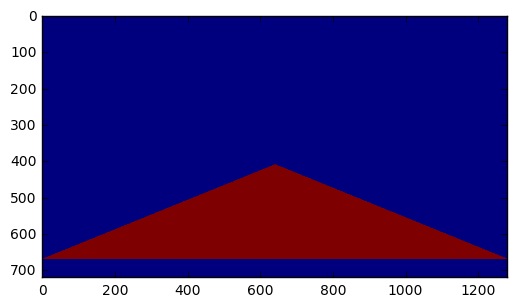

In [103]:
plt.imshow(roi)

In [104]:
def calibrate_camera(calibration_image_paths, test_image_path, nx, ny):

    # define the object points, these are the points that are on the chessboard
    objp = np.zeros((ny * nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-2, 2) # x, y coordinates
    
    # define the image points, these are the points that are in the real world
    # The goal here is to map the imgpoints (which are the coordinates on the image) to our 
    # predefined world coordinates

    imgpoints = [] # these are the 3D points in the real world space
    objpoints = [] # these are the 2D points in the image plane
    chessboards_with_drawn_corners = []
    test_image = plt.imread(test_image_path)
    test_image_size = (test_image.shape[1], test_image.shape[0])
    
    for image_path in calibration_image_paths:
        
        # if matplotlib is used
        image = mpimg.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


        # if cv2 is used although we don't use it to plot as it can't plot inline
    #     image = cv2.imread(image_path)
    #     print(image)
    #     break
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # note that we use BGR2GRAY 

        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp) 
            chessboard_with_drawn_corners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            chessboards_with_drawn_corners.append(chessboard_with_drawn_corners)
        
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_image_size, None, None)
    return mtx, dist

In [105]:
# test it
CALIBRATION_FOLDER_NAME = "camera_cal"

# image paths for calibration images
calibration_image_paths = glob.glob(os.path.join(CALIBRATION_FOLDER_NAME, "calibration*.jpg"))

# image path for test image
test_image_path = os.path.join(CALIBRATION_FOLDER_NAME, "test_for_calibration.jpg")

# For the parameters for the calibration
mtx, dist = calibrate_camera(calibration_image_paths, test_image_path, 9, 6)

In [106]:
Lhs = np.zeros((2,2), dtype = np.float32)
Rhs = np.zeros((2,1), dtype = np.float32)

In [107]:
i

[[ 639.52423096]
 [ 419.32043457]]


In [108]:
top = vanishing_point[1] + 60
bottom = ORIGINAL_SIZE[1] - 35
width = 530

def on_line(p1, p2, ycoord):
    return[p1[0] + (p2[0] - p1[0])/float(p2[1] - p1[1]) * (ycoord-p1[1]), ycoord]

p1 = [vanishing_point[0] - width/2, top]
p2 = [vanishing_point[0] + width/2, top]
p3 = on_line(p2, vanishing_point, bottom)
p4 = on_line(p1, vanishing_point, bottom)
src_points = np.array([p1,p2,p3,p4], dtype=np.float32)

dst_points = np.array([[0, 0], [UNWARPED_SIZE[0], 0],
                       [UNWARPED_SIZE[0], UNWARPED_SIZE[1]],
                       [0, UNWARPED_SIZE[1]]], dtype=np.float32)

In [109]:
print(src_points)
print(dst_points)

[[  374.52423096   479.32043457]
 [  904.52423096   479.32043457]
 [ 1812.94226074   685.        ]
 [ -533.89379883   685.        ]]
[[   0.    0.]
 [ 500.    0.]
 [ 500.  600.]
 [   0.  600.]]


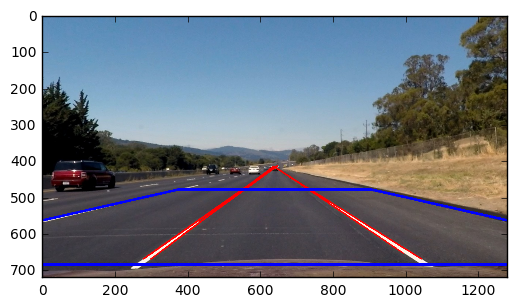

In [110]:
cv2.polylines(img, [src_points.astype(np.int32)], True, (0, 0, 255), thickness = 5)
plt.imshow(img)

In [111]:
M = cv2.getPerspectiveTransform(src_points, dst_points)